# Wine Unsupervised Clustering Project

### Introduction

In this project, I will use a Wine dataset from Kaggle to build an unsupervised clustering model. I will create a K-Means clustering algorithm to separate data in k clusters based on similar characteristics, such as alcohol content, color intensity, magnesium content and more. The optimal number of clusters will be found using the elbow method and the model will then be assessed using its inertia and silhouette score. 

Data Source: Kaggle (https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
from sklearn. preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns

### Loading the data

In [2]:
data = pd.read_csv('wine_data.csv')

### Investigating the data

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


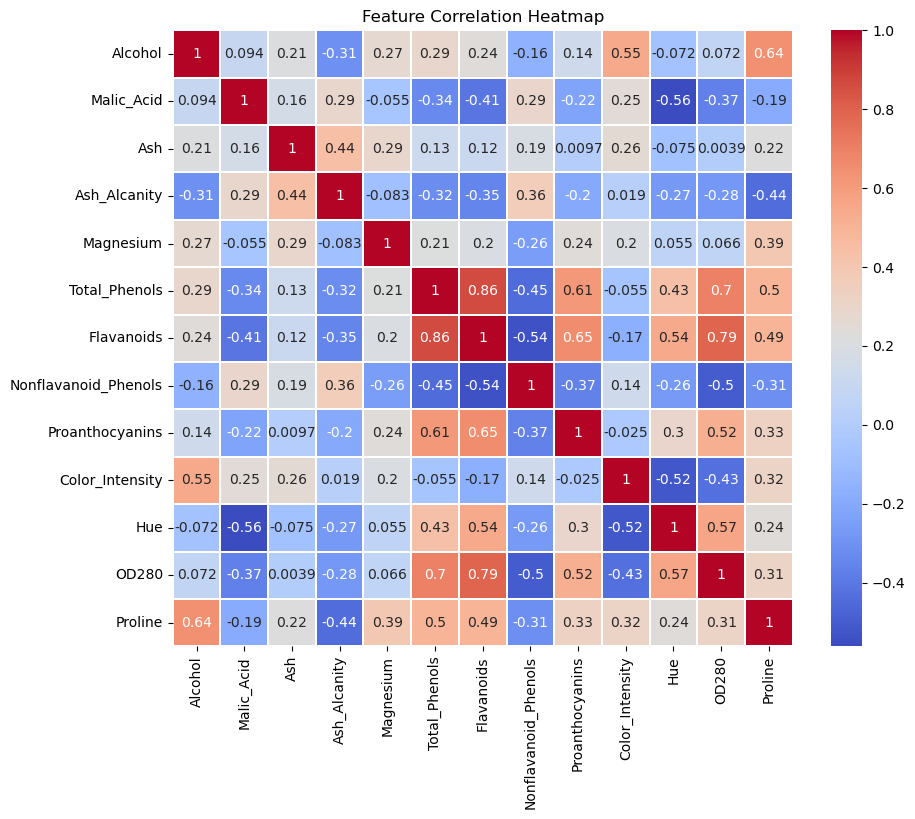

In [6]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.2)
plt.title('Feature Correlation Heatmap')
plt.show()

### Preparing the data

#### Scaling the data

In [7]:
scaler = MinMaxScaler()

In [8]:
X = scaler.fit_transform(data)
X = pd.DataFrame(X, columns = data.columns)

In [9]:
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


#### Finding the optimal number of clusters using the elbow method

When building a K-Means clustering model, the goal is to have low inertia and a small number of clusters. Inertia measures the distance of each data point from the centroid of its cluster. 

In order to find the optimal number of clusters for our model, we will plot the number of clusters (k) against inertia, as shown below.

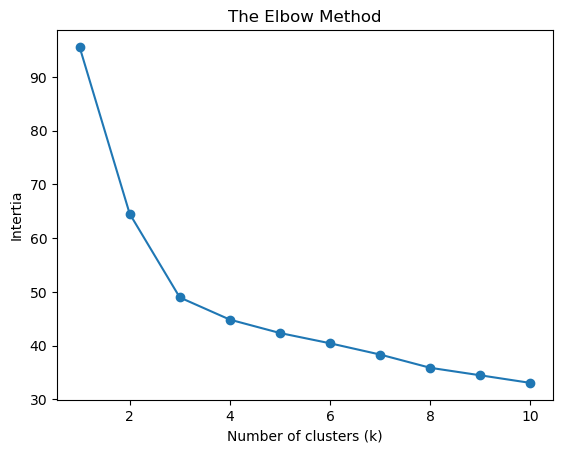

<Figure size 640x480 with 0 Axes>

In [10]:
inertias = []
num_clusters = range(1,11)
for i in num_clusters:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(num_clusters, inertias, '-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Intertia')
plt.show()
plt.clf()

Based on the figure above, the optimal number of clusters is k=3, where the curve becomes flatter (inertia begins to decrease more slowly).

### Building the Clustering Model

#### Creating the model and fitting it to the scaled data

In [11]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [12]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=0)

#### Predicting the cluster each datapoint in X belongs to

In [13]:
labels = kmeans.predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

### Evaluating the model

#### Investigating the model centroids and inertia

In [14]:
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [15]:
data['Clusters'] = labels

#### Plotting the centroids and clustering results (Alcohol vs Malic Acid)

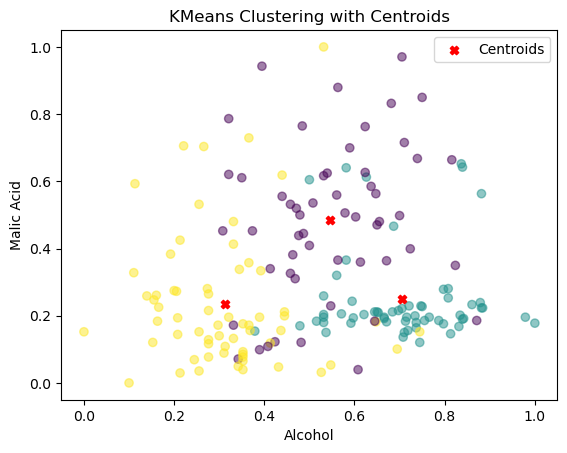

<Figure size 640x480 with 0 Axes>

In [16]:
plt.scatter(X['Alcohol'], X['Malic_Acid'], c = labels, cmap = 'viridis', marker = 'o', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X',label='Centroids')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('KMeans Clustering with Centroids')
plt.legend()
plt.show()
plt.clf()

#### Calculating the Silhouette Score of the model

In [17]:
silhouette_score(X, labels=kmeans.labels_, metric='euclidean')

0.3013463273503232

### Conclusion

In this project, I utilised the most popular unsupervised learning algorithm, the K-Means clustering. I investigated the data, which was already clean and used the elbow method to arrive at the optimal number of clusters for my data, k=3.
I then calculated the inertia of my model, which is a measure of the distance of each data point from the centroid of its cluster, to be at 48.95. The silhouette score of the model was 0.30. Both these metrics indicate that my model does a fairly good but not great job at clustering the datapoints.